<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/NN%20from%20Scratch-%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating a Neural Network From scratch using only Numpy and Maths.**

In [ ]:
import numpy as np  # Linear Algebra / Numerical Computations.
import pandas as pd
from matplotlib import pyplot as plt  # For Creating Plots and Visualizations.

In [ ]:
data = pd.read_csv('train.csv')
# data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([6., 9., 5., ..., 0., 8., 5.])

Our NN will have a simple two-layer architecture. Input layer a[0] will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer a[1] will have 10 units with ReLU activation, and finally our output layer a[2] will have 10 units corresponding to the ten digit classes with softmax activation.

Forward propagation

Z[1]=W[1]X+b[1]

A[1]=gReLU(Z[1])

Z[2]=W[2]A[1]+b[2]

A[2]=gsoftmax(Z[2])



Backward propagation

dZ[2]=A[2]−Y

dW[2]=1mdZ[2]A[1]T

dB[2]=1mΣdZ[2]

dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])

dW[1]=1mdZ[1]A[0]T

dB[1]=1mΣdZ[1]




Parameter updates

W[2]:=W[2]−αdW[2]
b[2]:=b[2]−αdb[2]
W[1]:=W[1]−αdW[1]
b[1]:=b[1]−αd




Vars and shapes

Forward prop

A[0]=X
 : 784 x m
Z[1]∼A[1]
 : 10 x m
W[1]
 : 10 x 784 (as  W[1]A[0]∼Z[1]
 )
B[1]
 : 10 x 1
Z[2]∼A[2]
 : 10 x m
W[1]
 : 10 x 10 (as  W[2]A[1]∼Z[2]
 )
B[2]
 : 10 x 1





Backprop

dZ[2]
 : 10 x m (  A[2]
 )
dW[2]
 : 10 x 10
dB[2]
 : 10 x 1
dZ[1]
 : 10 x m (  A[1]
 )
dW[1]
 : 10 x 10
dB[1]
 : 10 x 1



In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.shape[0], int(Y.max()) + 1)) # Cast Y.max() + 1 to integer
    one_hot_Y[np.arange(Y.shape[0]), Y.astype(int)] = 1 # Cast Y to integer for indexing
    one_hot_Y = one_hot_Y.T
    return one_hot_Y



def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2



In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 6 6 ... 7 8 6] [6. 9. 5. ... 0. 8. 5.]
0.10129525074726005
Iteration:  10
[6 4 6 ... 7 8 9] [6. 9. 5. ... 0. 8. 5.]
0.19495184324144801
Iteration:  20
[6 4 7 ... 7 8 5] [6. 9. 5. ... 0. 8. 5.]
0.32248422451012954
Iteration:  30
[4 4 7 ... 7 1 5] [6. 9. 5. ... 0. 8. 5.]
0.4161408170043175
Iteration:  40
[4 4 7 ... 7 1 5] [6. 9. 5. ... 0. 8. 5.]
0.46396545998007305
Iteration:  50
[4 4 7 ... 7 1 5] [6. 9. 5. ... 0. 8. 5.]
0.5117901029558286
Iteration:  60
[4 4 0 ... 0 1 5] [6. 9. 5. ... 0. 8. 5.]
0.5509797409498506
Iteration:  70
[6 4 0 ... 0 1 5] [6. 9. 5. ... 0. 8. 5.]
0.5825307206908004
Iteration:  80
[6 4 0 ... 0 8 5] [6. 9. 5. ... 0. 8. 5.]
0.6213882431086017
Iteration:  90
[6 4 0 ... 0 8 5] [6. 9. 5. ... 0. 8. 5.]
0.6466290269013617
Iteration:  100
[6 4 0 ... 0 8 5] [6. 9. 5. ... 0. 8. 5.]
0.6698771172367984
Iteration:  110
[6 4 0 ... 0 8 5] [6. 9. 5. ... 0. 8. 5.]
0.697442710063102
Iteration:  120
[6 4 0 ... 0 8 5] [6. 9. 5. ... 0. 8. 5.]
0.7077382929259383
Iterati

~86% accuracy on training data.

Making Predictions!!

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Examples..

Prediction:  [6]
Label:  6.0


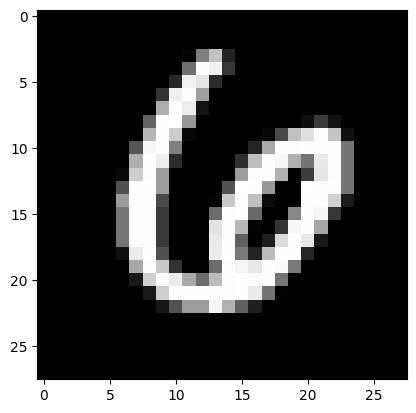

Prediction:  [9]
Label:  9.0


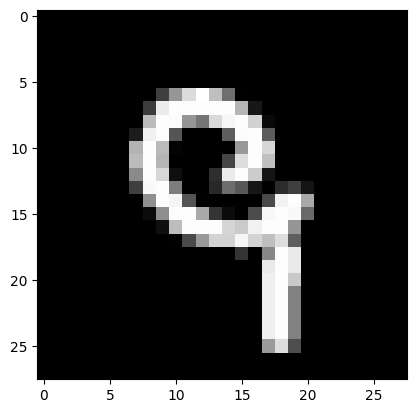

Prediction:  [5]
Label:  5.0


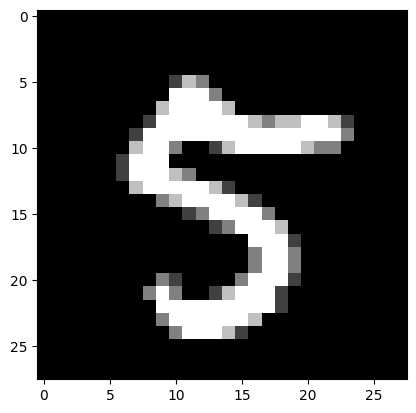

Prediction:  [6]
Label:  6.0


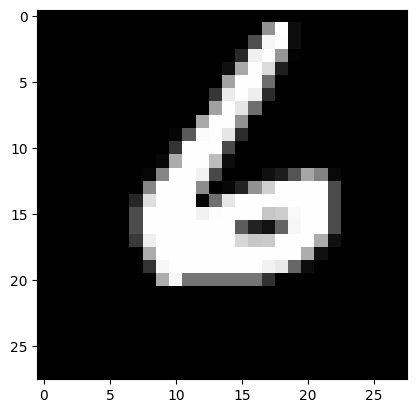

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy of the dev set:

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 7 2 4 2 7 1 3 5 4 1 7 1 2 0 2 3 9 1 3 7 9 8 5 6 6 1 5 6 4 8 6 9 3 0 7 9
 9 4 5 6 0 9 5 6 2 1 2 8 3 3 4 7 4 1 0 5 9 1 0 3 3 6 5 1 7 7 2 2 5 0 1 7 7
 9 8 2 8 0 8 4 4 3 8 9 7 2 0 6 5 3 4 1 8 4 9 7 2 2 2 6 2 6 3 1 9 4 5 8 8 3
 9 5 2 7 7 7 0 6 9 0 4 3 1 9 1 5 2 1 3 6 8 4 1 1 5 5 6 4 8 2 6 0 1 3 3 5 4
 6 1 3 5 3 1 8 9 6 8 1 8 3 2 2 6 8 8 0 5 5 9 9 0 9 2 4 1 4 6 1 1 1 6 1 8 6
 6 2 3 5 1 2 7 4 4 4 8 1 7 4 0 7 0 8 9 9 2 7 8 3 1 6 4 3 1 1 8 6 7 5 4 4 2
 5 4 0 2 2 7 4 9 1 9 6 0 0 6 2 5 8 2 0 9 0 7 6 8 8 6 6 2 6 9 9 9 2 1 9 6 0
 5 9 4 5 8 1 3 8 7 4 0 4 1 8 4 6 4 4 0 3 3 0 0 0 9 9 4 8 0 7 4 5 2 9 2 6 4
 4 1 2 4 9 9 0 8 2 4 9 4 1 8 1 5 0 7 3 6 4 4 3 5 7 1 3 6 2 9 8 4 0 2 3 5 7
 6 6 7 4 0 5 1 7 7 7 7 4 9 6 0 8 9 9 5 5 1 3 5 7 2 3 4 4 1 5 6 4 8 4 9 2 8
 8 2 0 0 7 3 7 4 8 8 8 0 3 0 1 8 8 0 7 8 8 1 8 1 6 8 5 6 2 8 9 9 7 2 7 5 4
 9 5 1 0 7 4 2 8 2 7 2 4 9 9 9 4 4 6 3 7 4 7 6 1 4 3 4 1 8 5 0 9 2 2 4 4 7
 0 1 7 3 3 0 5 2 3 7 3 5 5 7 2 5 8 1 6 2 7 0 0 3 6 5 1 7 6 7 3 4 6 1 1 7 1
 4 0 1 2 9 1 6 0 9 3 7 7 

0.813

~81% Acuuracy, that's pretty good generalization from our model on training data.